# Проект : Исследование поведения пользователей в мобильном приложении.

# Описание проекта

- Вы работаете в стартапе, который продаёт продукты питания. Нужно разобраться, как ведут себя пользователи вашего мобильного приложения. 
- Изучите воронку продаж. Узнайте, как пользователи доходят до покупки. Сколько пользователей доходит до покупки, а сколько — «застревает» на предыдущих шагах? На каких именно?
- После этого исследуйте результаты A/A/B-эксперимента. Дизайнеры захотели поменять шрифты во всём приложении, а менеджеры испугались, что пользователям будет непривычно. Договорились принять решение по результатам A/A/B-теста. Пользователей разбили на 3 группы: 2 контрольные со старыми шрифтами и одну экспериментальную — с новыми. Выясните, какой шрифт лучше.
- Создание двух групп A вместо одной имеет определённые преимущества. Если две контрольные группы окажутся равны, вы можете быть уверены в точности проведенного тестирования. Если же между значениями A и A будут существенные различия, это поможет обнаружить факторы, которые привели к искажению результатов. Сравнение контрольных групп также помогает понять, сколько времени и данных потребуется для дальнейших тестов.
- В случае общей аналитики и A/A/B-эксперимента работайте с одними и теми же данными. В реальных проектах всегда идут эксперименты. Аналитики исследуют качество работы приложения по общим данным, не учитывая принадлежность пользователей к экспериментам.

# Описание данных

- **EventName** — название события;
- **DeviceIDHash** — уникальный идентификатор пользователя;
- **EventTimestamp** — время события;
- **ExpId** — номер эксперимента: 246 и 247 — контрольные группы, а 248 — экспериментальная.

# Задачи исследования

# Изучение общей информации
- загрузить данные из файла в датафрейм
- изучить общую информацию о полученном датафрейме

# Предобработка данных

**Замена названия столбцов**
- определить, в каких столбцах есть необходимость заменить регистр и убрать пробелы
- произвести замену

**Изменение типов данных**
- проанализировать столбцы с данными
- преобразовать тип данных по необходимости

**Удаление пропусков**
- определить, в каких столбцах есть пропуски
- избавиться от пропущенных значений

**Обработка дубликатов**
- проанализировать столбцы с данными
- произвести устранение дубликатов

**Добавляю отдельный столбец дат**
- создаю дополнительный столбец

# Изучить и проверить данные
- Сколько всего событий в логе?
- Сколько всего пользователей в логе?
- Сколько в среднем событий приходится на пользователя?
- Данными за какой период вы располагаете? Найдите максимальную и минимальную дату. Постройте гистограмму по дате и времени. Можно ли быть уверенным, что у вас одинаково полные данные за весь период? Технически в логи новых дней по некоторым пользователям могут «доезжать» события из прошлого — это может «перекашивать данные». Определите, с какого момента данные полные и отбросьте более старые. Данными за какой период времени вы располагаете на самом деле?
- Много ли событий и пользователей вы потеряли, отбросив старые данные?
- Проверьте, что у вас есть пользователи из всех трёх экспериментальных групп.

# Изучить воронку событий
- Посмотрите, какие события есть в логах, как часто они встречаются. Отсортируйте события по частоте.
- Посчитайте, сколько пользователей совершали каждое из этих событий. Отсортируйте события по числу пользователей. Посчитайте долю пользователей, которые хоть раз совершали событие.
- Предположите, в каком порядке происходят события. Все ли они выстраиваются в последовательную цепочку? Их не нужно учитывать при расчёте воронки.
- По воронке событий посчитайте, какая доля пользователей проходит на следующий шаг воронки (от числа пользователей на предыдущем). То есть для последовательности событий A → B → C посчитайте отношение числа пользователей с событием B к количеству пользователей с событием A, а также отношение числа пользователей с событием C к количеству пользователей с событием B.
- На каком шаге теряете больше всего пользователей?
- Какая доля пользователей доходит от первого события до оплаты?

# Изучить результаты эксперимента
- Сколько пользователей в каждой экспериментальной группе?
- Есть 2 контрольные группы для А/А-эксперимента, чтобы проверить корректность всех механизмов и расчётов. Проверьте, находят ли статистические критерии разницу между выборками 246 и 247.
- Выберите самое популярное событие. Посчитайте число пользователей, совершивших это событие в каждой из контрольных групп. Посчитайте долю пользователей, совершивших это событие. Проверьте, будет ли отличие между группами статистически достоверным. Проделайте то же самое для всех других событий (удобно обернуть проверку в отдельную функцию). Можно ли сказать, что разбиение на группы работает корректно?
- Аналогично поступите с группой с изменённым шрифтом. Сравните результаты с каждой из контрольных групп в отдельности по каждому событию. Сравните результаты с объединённой контрольной группой. Какие выводы из эксперимента можно сделать?
- Какой уровень значимости вы выбрали при проверке статистических гипотез выше? Посчитайте, сколько проверок статистических гипотез вы сделали. При уровне значимости 0.1 каждый десятый раз можно получать ложный результат. Какой уровень значимости стоит применить? Если вы хотите изменить его, проделайте предыдущие пункты и проверьте свои выводы.

# Выводы

## Изучение общей информации

Импортирую библиотеки. Считываю данные из csv-файла в датафрейм и сохраняю в переменную.

In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import datetime as dt
import scipy.stats as stats
from datetime import datetime, timedelta
import math as mth
from plotly import graph_objects as go
import plotly.express as px
from plotly import graph_objects as go

In [81]:
try:
    logs = pd.read_csv('logs_exp.csv', sep='\t')
except:
    logs = pd.read_csv('/datasets/logs_exp.csv', sep='\t')

Просматриваю информацию в датафрейме

In [82]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', 120)

In [83]:
logs.head(10)

,EventName,DeviceIDHash,EventTimestamp,ExpId
0,MainScreenAppear,4575588528974610257,1564029816,246
1,MainScreenAppear,7416695313311560658,1564053102,246
2,PaymentScreenSuccessful,3518123091307005509,1564054127,248
3,CartScreenAppear,3518123091307005509,1564054127,248
4,PaymentScreenSuccessful,6217807653094995999,1564055322,248
5,CartScreenAppear,6217807653094995999,1564055323,248
6,OffersScreenAppear,8351860793733343758,1564066242,246
7,MainScreenAppear,5682100281902512875,1564085677,246
8,MainScreenAppear,1850981295691852772,1564086702,247
9,MainScreenAppear,5407636962369102641,1564112112,246


Вывожу основную информацию о датафрейме с помощью метода info()

In [84]:
logs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244126 entries, 0 to 244125
Data columns (total 4 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   EventName       244126 non-null  object
 1   DeviceIDHash    244126 non-null  int64 
 2   EventTimestamp  244126 non-null  int64 
 3   ExpId           244126 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 7.5+ MB


После первичного осмотра, обнаружено следуещее:
- необходимо поменять название и регистр столбцов
- привести столбец с датами к нужному формату

## Предобработка данных

Перед предобработкой сохраню первоначальные данные

In [85]:
old_logs = logs.copy()

### Замена регистра и названий столбцов

In [86]:
logs = logs.rename(columns ={'EventName':'event', 'DeviceIDHash':'id', 'EventTimestamp':'date', 'ExpId':'group'})

In [87]:
logs.head()

,event,id,date,group
0,MainScreenAppear,4575588528974610257,1564029816,246
1,MainScreenAppear,7416695313311560658,1564053102,246
2,PaymentScreenSuccessful,3518123091307005509,1564054127,248
3,CartScreenAppear,3518123091307005509,1564054127,248
4,PaymentScreenSuccessful,6217807653094995999,1564055322,248


### Обработка дубликатов

Проверим на наличие дубликатов

In [88]:
logs.duplicated().sum()

413

Избавляюсь от дубликатов

In [89]:
logs = logs.drop_duplicates()

In [90]:
logs.duplicated().sum()

0

Проверяем есть ли пользователи, которые попали в обе группы

In [91]:
logs.groupby('id').agg({'group' : 'nunique'}).query('group>1').count()

group    0
dtype: int64

Не обнаружено

### Изменение типов данных

In [92]:
logs['date'] = pd.to_datetime(logs['date'], unit='s')

In [93]:
logs.head()

,event,id,date,group
0,MainScreenAppear,4575588528974610257,2019-07-25 04:43:36,246
1,MainScreenAppear,7416695313311560658,2019-07-25 11:11:42,246
2,PaymentScreenSuccessful,3518123091307005509,2019-07-25 11:28:47,248
3,CartScreenAppear,3518123091307005509,2019-07-25 11:28:47,248
4,PaymentScreenSuccessful,6217807653094995999,2019-07-25 11:48:42,248


### Удаление пропусков

In [94]:
logs.isna().sum().sort_values(ascending=False)

event    0
id       0
date     0
group    0
dtype: int64

Пропусков не обнаружено

### Добавляю отдельный столбец дат

In [95]:
logs['dt'] = logs['date'].dt.date

In [96]:
logs.head()

,event,id,date,group,dt
0,MainScreenAppear,4575588528974610257,2019-07-25 04:43:36,246,2019-07-25
1,MainScreenAppear,7416695313311560658,2019-07-25 11:11:42,246,2019-07-25
2,PaymentScreenSuccessful,3518123091307005509,2019-07-25 11:28:47,248,2019-07-25
3,CartScreenAppear,3518123091307005509,2019-07-25 11:28:47,248,2019-07-25
4,PaymentScreenSuccessful,6217807653094995999,2019-07-25 11:48:42,248,2019-07-25


Проверим отброшенное кол-во данных

In [97]:
logs.shape[0] / old_logs.shape[0]

0.9983082506574474

Меньше 1% - приемлемо.

В результате проведения предообработки, проведены следующие действия и получены результаты
- заменены названия столбцов
- проведена проверка и устранение дубликатов
- были заменены типы данных в столбцах с датой и временем в датафрейме
- проведена проверка на наличие пропусков, пропусков не обнаружено
- добавлен отдельный столбец дат

## Изучить и проверить данные

### Сколько всего событий в логе?

In [98]:
logs['event'].value_counts()

MainScreenAppear           119101
OffersScreenAppear          46808
CartScreenAppear            42668
PaymentScreenSuccessful     34118
Tutorial                     1018
Name: event, dtype: int64

In [99]:
len(logs['event'].value_counts())

5

In [100]:
full_event_sum = len(logs['event'])
full_event_sum

243713

In [101]:
print('Всего разных событий в логе', len(logs['event'].value_counts()))
print('Всего событий в логе', full_event_sum)

Всего разных событий в логе 5
Всего событий в логе 243713


### Сколько всего пользователей в логе?

In [102]:
full_id_sum = len(logs['id'].value_counts())
full_id_sum

7551

In [103]:
print('Всего в логе', full_id_sum, 'пользователь')

Всего в логе 7551 пользователь


### Сколько в среднем событий приходится на пользователя?

In [104]:
events = logs.pivot_table(index='id',values='event',aggfunc='count')

In [105]:
events.sort_values(by='event', ascending=False).head(10)

,event
id,
6304868067479728361,2307
197027893265565660,1998
4623191541214045580,1768
6932517045703054087,1439
1754140665440434215,1221
3337471580007169353,1186
7738058666231999878,888
1055544042902443290,854
4713748699910253089,824


In [106]:
events.sort_values(by='event', ascending=False).tail(10)

,event
id,
6711676849811968731,1
442591501621146365,1
7425867810605704181,1
5229230634268921313,1
2141951348073372988,1
7399061063341528729,1
2968164493349205501,1
8071397669512236988,1
425817683219936619,1


In [107]:
event_mean = events['event'].mean()

In [108]:
event_mean

32.27559263673685

In [109]:
print('В среднем на пользователя приходится', round(event_mean, 2), 'событий')

В среднем на пользователя приходится 32.28 событий


### Данными за какой период мы располагаем? Найдем максимальную и минимальную дату. Построим гистограмму по дате и времени. Можно ли быть уверенным, что у нас одинаково полные данные за весь период? Технически в логи новых дней по некоторым пользователям могут «доезжать» события из прошлого — это может «перекашивать данные». Определим, с какого момента данные полные и отбросим более старые. Данными за какой период времени мы располагаете на самом деле?

In [110]:
print('Минимальная дата:', (logs['dt']).min())
print('Максимальная дата:', (logs['dt']).max())

Минимальная дата: 2019-07-25
Максимальная дата: 2019-08-07


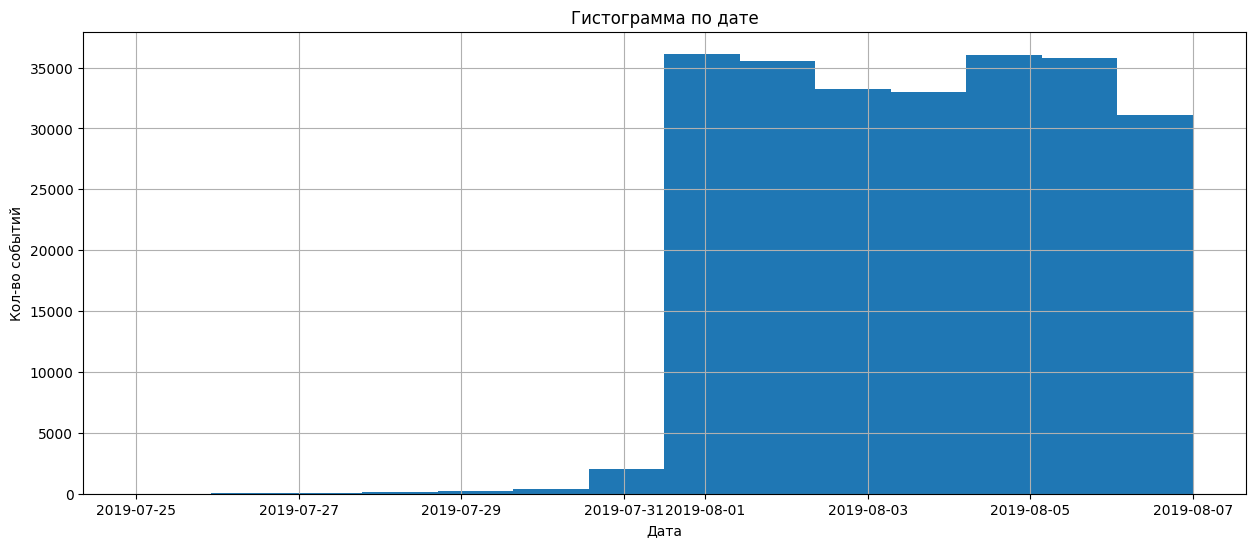

In [111]:
plt.figure(figsize=(15,6))
logs['dt'].hist(bins = 14)
plt.title("Гистограмма по дате")
plt.xlabel("Дата")
plt.ylabel("Кол-во событий")
plt.show();

<div class="alert alert-block alert-success">

**Комментарий ревьювера (все отлично)**
    
Визуализация на хорошем уровне. Здорово, что уделяешь внимание оформлению графиков.
    
Предлагаю изучить интересные методы по визуализации. Прикрепляю несколько интересных ссылок:

https://coderlessons.com/tutorials/python-technologies/izuchai-siborna/siborn-kratkoe-rukovodstvo

https://tproger.ru/translations/python-data-vizualization/
</div>

Судя по графику наиболее полные данные начинаются с 01.08.2019 и заканчиваются 07.08.2019, возьмем этот промежуток времени и посторим еще одну гистограмму.

In [112]:
logs['dt'] = pd.to_datetime(logs['dt'])
logs_real_dt = logs.query('dt >= "2019-08-01"')

<div class="alert alert-block alert-success">

**Комментарий ревьювера (все отлично)**
    
Верный выбор даты, с которой фильтруешь данные.

</div>

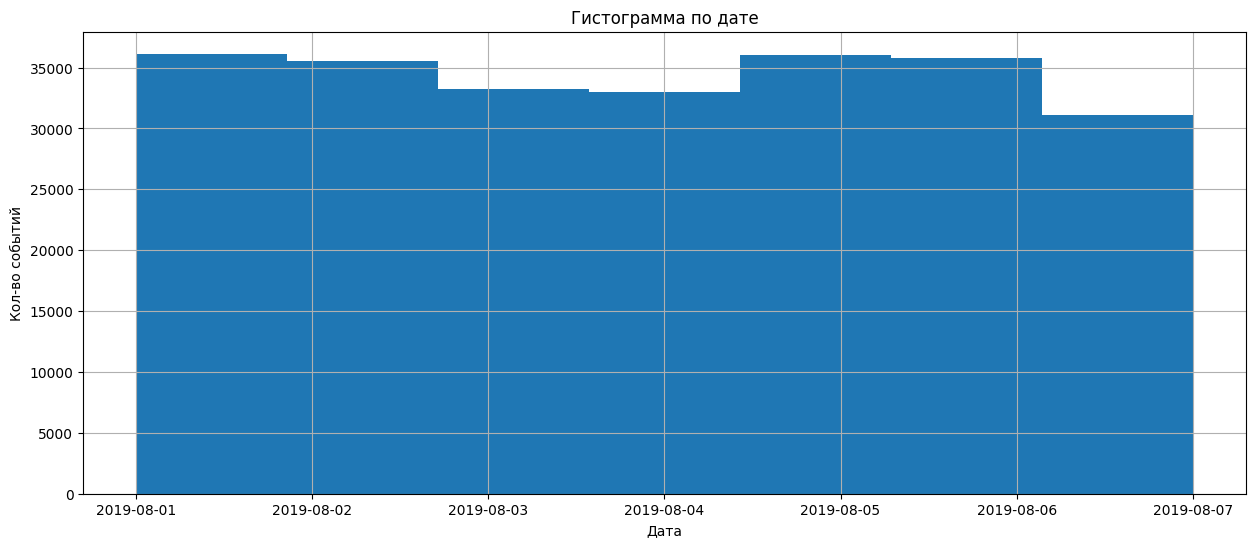

In [113]:
plt.figure(figsize=(15,6))
logs_real_dt['dt'].hist(bins = 7)
plt.title("Гистограмма по дате")
plt.xlabel("Дата")
plt.ylabel("Кол-во событий")
plt.show();

Получается, что мы распологаем данными за 7 дней.

### Много ли событий и пользователей мы потеряли, отбросив старые данные?

In [114]:
new_event_sum = len(logs_real_dt['event'])
new_event_sum

240887

In [115]:
new_id_sum = len(logs_real_dt['id'].value_counts())
new_id_sum

7534

In [116]:
print('Было утеряно событий:', full_event_sum - new_event_sum)
print('Было утеряно пользователей:', full_id_sum - new_id_sum)

Было утеряно событий: 2826
Было утеряно пользователей: 17


In [117]:
print('Было утеряно событий:',  round((1 - new_event_sum/full_event_sum), 3)*100, '%')
print('Было утеряно пользователей:', round((1 - new_id_sum/full_id_sum), 3)*100, '%')

Было утеряно событий: 1.2 %
Было утеряно пользователей: 0.2 %


### Проверим, что у нас есть пользователи из всех трёх экспериментальных групп.

In [118]:
logs_real_dt.groupby('group')['id'].count()

group
246    79302
247    77022
248    84563
Name: id, dtype: int64

Порядка 80к событий приходится на каждую группу

## Изучить воронку событий

### Посмотрим, какие события есть в логах, как часто они встречаются. Отсортируем события по частоте.

In [119]:
logs_real_dt['event'].value_counts()

MainScreenAppear           117328
OffersScreenAppear          46333
CartScreenAppear            42303
PaymentScreenSuccessful     33918
Tutorial                     1005
Name: event, dtype: int64

Из пяти событий чаще всего происходит событие MainScreenAppear, и реже всего Tutorial

### Посчитаем, сколько пользователей совершали каждое из этих событий. Отсортируем события по числу пользователей. Посчитаем долю пользователей, которые хоть раз совершали событие.

In [120]:
event_id = logs_real_dt.pivot_table(index='event', values='id',aggfunc='nunique').sort_values(by='id', ascending=False)
event_id

,id
event,
MainScreenAppear,7419
OffersScreenAppear,4593
CartScreenAppear,3734
PaymentScreenSuccessful,3539
Tutorial,840


In [121]:
event_id['share %'] = round(event_id['id']/logs_real_dt['id'].nunique(), 4)*100
event_id = event_id.reset_index()
event_id

,event,id,share %
0,MainScreenAppear,7419,98.47
1,OffersScreenAppear,4593,60.96
2,CartScreenAppear,3734,49.56
3,PaymentScreenSuccessful,3539,46.97
4,Tutorial,840,11.15


### Предположим, в каком порядке происходят события. Все ли они выстраиваются в последовательную цепочку? Их не нужно учитывать при расчёте воронки.

Здесь складывается классическая воронка: 
- Главный экран  
- Выбор предложения 
- Добавление в корзину 
- Оплата 

У Руководства (Tutorial) такой низкий показатель, потому как его мало кто читает. Его при расчете воронки не стоит учитывать.

In [122]:
event_id.drop([4], inplace=True)
event_id

,event,id,share %
0,MainScreenAppear,7419,98.47
1,OffersScreenAppear,4593,60.96
2,CartScreenAppear,3734,49.56
3,PaymentScreenSuccessful,3539,46.97


Построим график воронки

In [148]:
fig = go.Figure(go.Funnel(
    
    y = event_id['event'],
    x =  event_id['id'],
    textposition = "inside",
    textinfo = "value+percent total"))
    
fig.show()

### По воронке событий посчитаем, какая доля пользователей проходит на следующий шаг воронки (от числа пользователей на предыдущем). То есть для последовательности событий A → B → C посчитаем отношение числа пользователей с событием B к количеству пользователей с событием A, а также отношение числа пользователей с событием C к количеству пользователей с событием B.

In [124]:
MainScreenAppear_to_OffersScreenAppear = round(event_id['id'][1]/event_id['id'][0], 2)*100
print('С события MainScreenAppear к событию OffersScreenAppear перешло:', MainScreenAppear_to_OffersScreenAppear, '% пользователей') 

С события MainScreenAppear к событию OffersScreenAppear перешло: 62.0 % пользователей


In [125]:
OffersScreenAppear_to_CartScreenAppear  = round(event_id['id'][2]/event_id['id'][1], 2)*100
print('С события OffersScreenAppear к событию CartScreenAppear перешло:', OffersScreenAppear_to_CartScreenAppear, '% пользователей')

С события OffersScreenAppear к событию CartScreenAppear перешло: 81.0 % пользователей


In [126]:
CartScreenAppear_to_PaymentScreenSuccessful = round(event_id['id'][3]/event_id['id'][2], 2)*100
print('С события CartScreenAppear к событию PaymentScreenSuccessful:',CartScreenAppear_to_PaymentScreenSuccessful, '% пользователей')

С события CartScreenAppear к событию PaymentScreenSuccessful: 95.0 % пользователей


### На каком шаге теряеем больше всего пользователей?

Переход события MainScreenAppear к событию OffersScreenAppear теряет максимальное кол-во пользователей

### Какая доля пользователей доходит от первого события до оплаты?

In [127]:
MainScreenAppear_to_PaymentScreenSuccessful = round(event_id['id'][3]/event_id['id'][0], 2)*100
print('От первого события до оплаты доходит:', MainScreenAppear_to_PaymentScreenSuccessful, '% пользователей')

От первого события до оплаты доходит: 48.0 % пользователей


После изучения воронки событий получены следующие результаты:
- Из пяти событий чаще всего происходит событие MainScreenAppear, и реже всего Tutorial
- Подсчитано, сколько пользователей совершали каждое из этих событий
- Сформирована воронка событий:
   - Главный экран  MainScreenAppear
   - Выбор предложения OffersScreenAppear
   - Добавление в корзину CartScreenAppear
   - Оплата PaymentScreenSuccessful
- Посчитан процент пользователей при переходе между событиями.
    - С события MainScreenAppear к событию OffersScreenAppear перешло: 62.0 % пользователей
    - С события OffersScreenAppear к событию CartScreenAppear перешло: 81.0 % пользователей
    - С события CartScreenAppear к событию PaymentScreenSuccessful: 95.0 % пользователей
- Определили, на каком шаге теряется больше всего пользователей, переход события MainScreenAppear к событию OffersScreenAppear
- Определили, какая доля пользователей доходит от первого события до оплаты: до оплаты доходит: 48.0 % пользователей

<div class="alert alert-block alert-success">

**Комментарий ревьювера (все отлично)**
    
По выводам все верно. После первого события теряется больше всего пользователей. Около половины клиентов доходит с первого этапа до последнего.

</div>

## Изучить результаты эксперимента

### Сколько пользователей в каждой экспериментальной группе?

In [128]:
group_id = logs_real_dt.pivot_table(index='group', values='id',aggfunc='nunique').sort_values(by='group', ascending=True)
group_id

,id
group,
246,2484
247,2513
248,2537


Больше всего пользователей в группе 248, в ней 2537 пользователей. Меньше всего в группе 246, в ней 2484 пользователя, по серединке группа 247, в ней 2513 пользователей.

### Есть 2 контрольные группы для А/А-эксперимента, чтобы проверить корректность всех механизмов и расчётов. Проверим, находят ли статистические критерии разницу между выборками 246 и 247.

Создаем сводную таблицу с распределением пользоватлей по событиям и группам

In [129]:
group_event = logs_real_dt.pivot_table(index='group',columns = 'event', values='id', aggfunc='nunique')
group_event

event,CartScreenAppear,MainScreenAppear,OffersScreenAppear,PaymentScreenSuccessful,Tutorial
group,,,,,
246,1266,2450,1542,1200,278
247,1238,2476,1520,1158,283
248,1230,2493,1531,1181,279


Удаляем событие Tutorial, и добавляем общее число пользователей в каждой экспериментальной группе

In [130]:
del group_event['Tutorial']
group_event_id = group_event.merge(group_id,  left_on='group', right_on='group', how='left').reset_index()
group_event_id

,group,CartScreenAppear,MainScreenAppear,OffersScreenAppear,PaymentScreenSuccessful,id
0,246,1266,2450,1542,1200,2484
1,247,1238,2476,1520,1158,2513
2,248,1230,2493,1531,1181,2537


Построим график воронки

In [149]:
from plotly import graph_objects as go

fig = go.Figure()

fig.add_trace(go.Funnel(
    name = 'Gpoup 246',
    y = event_id['event'],
    x = [group_event_id['MainScreenAppear'].loc[0],
         group_event_id['OffersScreenAppear'].loc[0],
         group_event_id['CartScreenAppear'].loc[0],
         group_event_id['PaymentScreenSuccessful'].loc[0]],
    textinfo = "value+percent initial"))

fig.add_trace(go.Funnel(
    name = 'Gpoup 247',
    orientation = "h",
    y = event_id['event'],
    x = [group_event_id['MainScreenAppear'].loc[1],
         group_event_id['OffersScreenAppear'].loc[1],
         group_event_id['CartScreenAppear'].loc[1],
         group_event_id['PaymentScreenSuccessful'].loc[1]],
    textposition = "inside",
    textinfo = "value+percent previous"))

fig.add_trace(go.Funnel(
    name = 'Gpoup 248',
    orientation = "h",
    y = event_id['event'],
    x = [group_event_id['MainScreenAppear'].loc[2],
         group_event_id['OffersScreenAppear'].loc[2],
         group_event_id['CartScreenAppear'].loc[2],
         group_event_id['PaymentScreenSuccessful'].loc[2]],
    textposition = "inside",
    textinfo = "value+percent total"))

fig.show()

In [132]:
group_event_id.loc[3] = group_event_id.loc[0] +  group_event_id.loc[1]
group_event_id

,group,CartScreenAppear,MainScreenAppear,OffersScreenAppear,PaymentScreenSuccessful,id
0,246,1266,2450,1542,1200,2484
1,247,1238,2476,1520,1158,2513
2,248,1230,2493,1531,1181,2537
3,493,2504,4926,3062,2358,4997


Определяем нулевую и альтернативную гипотезы

- Нулевая гипотеза H0: Между долями нет значимой разница
- Альтернативная гипотеза H1: Между долями есть значимая разницы
- alpha = 0.1 критический уровень статистической значимости
- Используем Проверка гипотезы о равенстве долей, с методом stats.cdf(), рассчитать кумулятивную функцию распределения (CDF) для случайной выборки данных.

Создаем дополнительные переменные

In [133]:
user_id = np.array(group_event_id['id'])
main = np.array(group_event_id['MainScreenAppear'])
offers = np.array(group_event_id['OffersScreenAppear'])
cart = np.array(group_event_id['CartScreenAppear'])
payment = np.array(group_event_id['PaymentScreenSuccessful'])

Создаю функцию для проведения эксперемента

In [134]:
def group_experiment (purchases, leads, alpha):
   
    p1 = purchases[0]/leads[0]

    p2 = purchases[1]/leads[1]

    p_combined = (purchases[0] + purchases[1]) / (leads[0] + leads[1])

    difference = p1 - p2 

    z_value = difference / mth.sqrt(p_combined * (1 - p_combined) * (1/leads[0] + 1/leads[1]))

    distr = stats.norm(0, 1)

    p_value = (1 - distr.cdf(abs(z_value))) * 2

    print('p-значение: ', p_value)

    if p_value < alpha:
        print('Отвергаем нулевую гипотезу: между долями есть значимая разница')
        print('')
    else:
        print('Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными')
        print('')

Доробатываю функцию таким образом, чтобы передавать индексы групп

In [135]:
def index (index1, index2, alpha):
    a = alpha
    u = ([user_id[index1], user_id[index2]])
    m = ([main[index1], main[index2]])
    o = ([offers[index1], offers[index2]])
    c = ([cart[index1], cart[index2]])
    p = ([payment[index1], payment[index2]])
    
    print('Событие MainScreenAppear')
    group_experiment(m,u,a)
    
    print('Событие OffersScreenAppear')
    group_experiment(o,u,a)
    
    print('Событие CartScreenAppear')
    group_experiment(c,u,a)
    
    print('Событие PaymentScreenSuccessful')
    group_experiment(p,u,a)

### Выбераем самое популярное событие. Посчитаем число пользователей, совершивших это событие в каждой из контрольных групп. Посчитаем долю пользователей, совершивших это событие. Проверим, будет ли отличие между группами статистически достоверным. Проделайте то же самое для всех других событий (удобно обернуть проверку в отдельную функцию). Можно ли сказать, что разбиение на группы работает корректно?

Проверяем гипотезу для групп 246/247

In [136]:
index (0, 1, 0.05)

Событие MainScreenAppear
p-значение:  0.7570597232046099
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными

Событие OffersScreenAppear
p-значение:  0.2480954578522181
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными

Событие CartScreenAppear
p-значение:  0.22883372237997213
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными

Событие PaymentScreenSuccessful
p-значение:  0.11456679313141849
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными



Не удалось опровергнуть нулевую гипотезу, значит можно сказать, что разбиение на группы работает корректно

### Аналогично поступим с группой с изменённым шрифтом. Сравним результаты с каждой из контрольных групп в отдельности по каждому событию. Сравним результаты с объединённой контрольной группой. Какие выводы из эксперимента можно сделать?

Проверяем гипотезу для групп 246/248

In [137]:
index (0, 2, 0.05)

Событие MainScreenAppear
p-значение:  0.2949721933554552
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными

Событие OffersScreenAppear
p-значение:  0.20836205402738917
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными

Событие CartScreenAppear
p-значение:  0.07842923237520116
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными

Событие PaymentScreenSuccessful
p-значение:  0.2122553275697796
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными



При событие добавление в карзину нулевая гипотеза не подтвердилась, разница между долями имеется

Проверяем гипотезу для групп 247/248

In [138]:
index (1, 2, 0.05)

Событие MainScreenAppear
p-значение:  0.4587053616621515
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными

Событие OffersScreenAppear
p-значение:  0.9197817830592261
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными

Событие CartScreenAppear
p-значение:  0.5786197879539783
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными

Событие PaymentScreenSuccessful
p-значение:  0.7373415053803964
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными



Не удалось опровергнуть нулевую гипотезу, различия между долями незначительно

Проверяем гипотезу для групп 249/248

In [139]:
index (3, 2, 0.05)

Событие MainScreenAppear
p-значение:  0.29424526837179577
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными

Событие OffersScreenAppear
p-значение:  0.43425549655188256
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными

Событие CartScreenAppear
p-значение:  0.18175875284404386
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными

Событие PaymentScreenSuccessful
p-значение:  0.6004294282308704
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными



Не удалось опровергнуть нулевую гипотезу, различия между долями незначительно

### Какой уровень значимости мы выбрали при проверке статистических гипотез выше? Посчитаем, сколько проверок статистических гипотез мы сделали. При уровне значимости 0.1 каждый десятый раз можно получать ложный результат. Какой уровень значимости стоит применить? Если мы хотим изменить его, проделаем предыдущие пункты и проверим свои выводы.

Было проведено 16 проверок статистических гипотез при уровни значимости 0.05 нулевую гипотезу не удалось опровергнуть ни разу. Различий между группами нет.

## Выводы

В рамках проекта был получен, изучен и обработан архив данных пользователи мобильного приложения.

Были заменены названия столбцов, заменены типы данных, а также устранены дубликаты. Проведена проверка на наличие пропусков. Добавлен отдельный столбец дат.

Изучены и проверены данные, получены следующие результаты:
- Всего разных событий в логе 5
- Всего событий в логе 243713
- Всего в логе 7551 пользователь
- В среднем на пользователя приходится 32.28 событий
- Наиболее полные данные начинаются с 01.08.2019 и заканчиваются 07.08.2019

После изучения воронки событий получены следующие результаты:
- Из пяти событий чаще всего происходит событие MainScreenAppear, и реже всего Tutorial
- Подсчитано, сколько пользователей совершали каждое из этих событий
- Сформирована воронка событий:
   - Главный экран  MainScreenAppear
   - Выбор предложения OffersScreenAppear
   - Добавление в корзину CartScreenAppear
   - Оплата PaymentScreenSuccessful
- Посчитан процент пользователей при переходе между событиями.
    - С события MainScreenAppear к событию OffersScreenAppear перешло: 62.0 % пользователей
    - С события OffersScreenAppear к событию CartScreenAppear перешло: 81.0 % пользователей
    - С события CartScreenAppear к событию PaymentScreenSuccessful: 95.0 % пользователей
- Определили, на каком шаге теряется больше всего пользователей, переход события MainScreenAppear к событию OffersScreenAppear
- Определили, какая доля пользователей доходит от первого события до оплаты: до оплаты доходит: 48.0 % пользователей

Изучены результаты эксперимента, результаты такие:
- Статистическая значимость 0.05: было проведено 16 проверок статистических гипотез нулевую гипотезу не удалось опровергнуть ни разу. Различий между группами незначительные.

По результатам проведенных исследований можно сделать следующий вывод: нет необходимости менять шрифт на сайте, так как в результате не будет достигнуто каких либо значимых результатов, но будут затрачены ресурсы на данное изменение.